In [28]:
import pandas as pd
import numpy as np

In [46]:
df = pd.read_csv("/Time_series_analysis_and_forecast.csv")

In [47]:
df.head()

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01 00:00:00,15.8,1688.215,3.69,23.710
1,2010-09-01 01:00:00,15.8,1669.195,3.69,22.635
2,2010-09-01 02:00:00,15.8,1491.980,3.69,22.565
3,2010-09-01 03:00:00,15.8,1330.760,3.69,18.910
4,2010-09-01 04:00:00,15.8,1247.940,3.69,18.030


1. FullDate: Date in format yyyy-mm-dd  hh:mm:ss
2. ElecPrice: Prices of electricity charged in Kw per hour
3. Gas Price: power generated was done via a gas power plant, gas price is the price of gas at time-T
4. SysLoad: Total Load on system or Power consumed at time-T
5. Tmax: maximum temperature at time-T






In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92016 entries, 0 to 92015
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   FullDate   92016 non-null  object 
 1   Tmax       92016 non-null  float64
 2   SysLoad    92016 non-null  float64
 3   GasPrice   92016 non-null  float64
 4   ElecPrice  92016 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.5+ MB


In [49]:
df.shape

(92016, 5)

In [50]:
df['FullDate'] = pd.to_datetime(df['FullDate'])
df.sort_values(by='FullDate', inplace=True)
df.reset_index(drop=True, inplace=True)

df.head()


,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01 00:00:00,15.8,1688.215,3.69,23.710
1,2010-09-01 01:00:00,15.8,1669.195,3.69,22.635
2,2010-09-01 02:00:00,15.8,1491.980,3.69,22.565
3,2010-09-01 03:00:00,15.8,1330.760,3.69,18.910
4,2010-09-01 04:00:00,15.8,1247.940,3.69,18.030


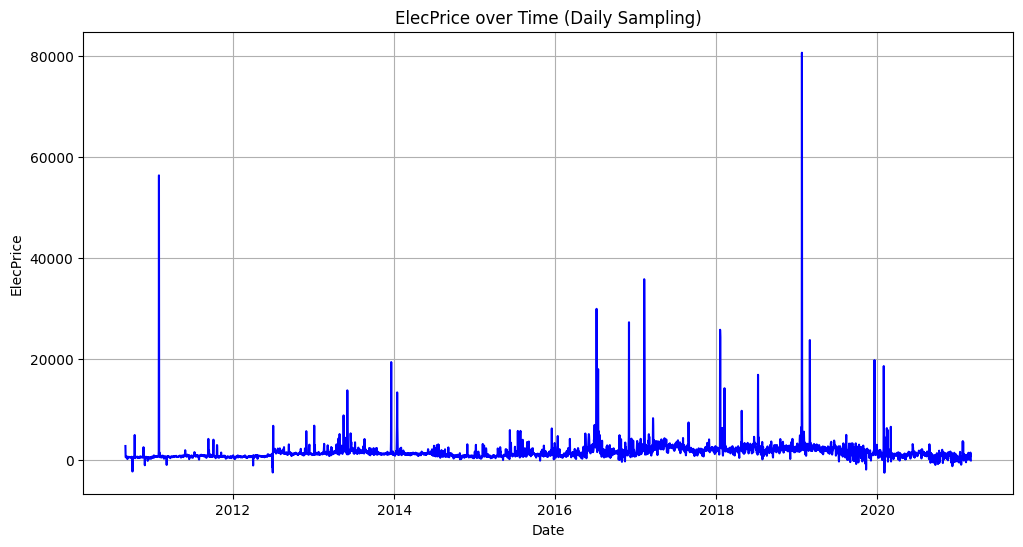

In [19]:
import matplotlib.pyplot as plt

df['FullDate'] = pd.to_datetime(df['FullDate'])
df.set_index('FullDate', inplace=True)
daily_data = df.resample('D').sum()
plt.figure(figsize=(12, 6))
plt.plot(daily_data.index, daily_data['ElecPrice'], color='blue')
plt.xlabel('Date')
plt.ylabel('ElecPrice')
plt.title('ElecPrice over Time (Daily Sampling)')
plt.grid(True)
plt.show()


In [22]:
from statsmodels.tsa.stattools import adfuller

# Load the resampled dataset (assuming you have already resampled the data as shown in the previous code)
# Replace 'your_resampled_dataset.csv' with the actual file path of your resampled dataset


# Perform the Augmented Dickey Fuller test for 'SysLoad'
result_sysload = adfuller(daily_data['SysLoad'])
p_value_sysload = result_sysload[1]

# Perform the Augmented Dickey Fuller test for 'GasPrice'
result_gasprice = adfuller(daily_data['GasPrice'])
p_value_gasprice = result_gasprice[1]

# Print the P-values to 6 decimal places
print("P-value for SysLoad:", format(p_value_sysload, ".6f"))
print("P-value for GasPrice:", format(p_value_gasprice, ".6f"))


P-value for SysLoad: 0.004254
P-value for GasPrice: 0.045027


In [24]:

result_gasprice = adfuller(daily_data['GasPrice'])
critical_values_gasprice = result_gasprice[4]

# Perform the Augmented Dickey Fuller test for 'ElecPrice'
result_elecprice = adfuller(daily_data['ElecPrice'])
critical_values_elecprice = result_elecprice[4]

# Print the critical values at 10% and 5% significance levels to 4 decimal places
print("10% Critical Value for GasPrice:", format(critical_values_gasprice['10%'], ".4f"))
print("5% Critical Value for GasPrice:", format(critical_values_gasprice['5%'], ".4f"))

print("10% Critical Value for ElecPrice:", format(critical_values_elecprice['10%'], ".4f"))
print("5% Critical Value for ElecPrice:", format(critical_values_elecprice['5%'], ".4f"))


10% Critical Value for GasPrice: -2.5672
5% Critical Value for GasPrice: -2.8623
10% Critical Value for ElecPrice: -2.5672
5% Critical Value for ElecPrice: -2.8623


In [51]:

train_length = 2757
train_set = df.iloc[:train_length]
test_set = df.iloc[train_length:]


In [38]:
train_set.shape

(2757, 4)

In [39]:
test_set.shape

(1077, 4)

In [52]:
from prophet import Prophet

train_df = train_set[['FullDate', 'ElecPrice']]
train_df.rename(columns={'FullDate': 'ds', 'ElecPrice': 'y'}, inplace=True)
model = Prophet()
model.fit(train_df)
test_df = test_set[['FullDate']]
test_df.rename(columns={'FullDate': 'ds'}, inplace=True)
forecast = model.predict(test_df)
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())


<ipython-input-52-a48d777e5796>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df.rename(columns={'FullDate': 'ds', 'ElecPrice': 'y'}, inplace=True)
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp83e1xk1y/g82sglc0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp83e1xk1y/ummhbtff.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=52801', 'data', 'file=/tmp/tmp83e1xk1y/g82sglc0.json', 'init=/tmp/tmp83e1xk1y/ummhbtff.json', 'output', 'file=/tmp/tmp83e1xk1y/prophet_model_44re4qb/prophet_model-20230801181612.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=

                       ds        yhat    yhat_lower    yhat_upper
89254 2021-02-28 19:00:00 -989.464236 -31800.925654  29093.465817
89255 2021-02-28 20:00:00 -993.207575 -31826.710418  29138.275513
89256 2021-02-28 21:00:00 -995.826413 -31727.523761  29143.426544
89257 2021-02-28 22:00:00 -995.192062 -31814.248420  29184.287066
89258 2021-02-28 23:00:00 -992.381905 -31821.256252  29091.772504


In [26]:
train_df = train_set[['FullDate', 'ElecPrice']]
train_df.rename(columns={'FullDate': 'ds', 'ElecPrice': 'y'}, inplace=True)
model = Prophet()
model.fit(train_df)
test_df = test_set[['FullDate']]
test_df.rename(columns={'FullDate': 'ds'}, inplace=True)
forecast = model.predict(test_df)
actual_values = test_set['ElecPrice']
predicted_values = forecast['yhat']

# Avoid division by zero by replacing zero actual values with a small positive number
epsilon = 1e-8  # A small positive number to avoid division by zero
actual_values_nonzero = actual_values.replace(0, epsilon)

absolute_percentage_errors = abs((actual_values - predicted_values) / actual_values_nonzero)
mape = 100 * absolute_percentage_errors.mean()

# Print the MAPE in 2 decimal places
print("MAPE on the test set:", format(mape, ".2f"), "%")




<ipython-input-26-2f6fa4c1cb11>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df.rename(columns={'FullDate': 'ds', 'ElecPrice': 'y'}, inplace=True)
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp83e1xk1y/d7r490zf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp83e1xk1y/kys0zhn4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=98702', 'data', 'file=/tmp/tmp83e1xk1y/d7r490zf.json', 'init=/tmp/tmp83e1xk1y/kys0zhn4.json', 'output', 'file=/tmp/tmp83e1xk1y/prophet_modeljs8fa5hk/prophet_model-20230801175311.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=

MAPE on the test set: 1363710873.76 %


In [29]:
train_df = train_set[['FullDate', 'ElecPrice']]
train_df.rename(columns={'FullDate': 'ds', 'ElecPrice': 'y'}, inplace=True)
model = Prophet()
model.fit(train_df)

# Make predictions on the test set
test_df = test_set[['FullDate']]
test_df.rename(columns={'FullDate': 'ds'}, inplace=True)
forecast = model.predict(test_df)

# Calculate the Root Mean Squared Error (RMSE) on the test set
actual_values = test_set['ElecPrice']
predicted_values = forecast['yhat']
rmse = np.sqrt(((actual_values - predicted_values) ** 2).mean())

# Print the RMSE in 2 decimal places
print("RMSE on the test set:", format(rmse, ".2f"))

<ipython-input-29-1e3b9afb85b6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df.rename(columns={'FullDate': 'ds', 'ElecPrice': 'y'}, inplace=True)
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp83e1xk1y/s2xobzjq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp83e1xk1y/d512niof.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=14490', 'data', 'file=/tmp/tmp83e1xk1y/s2xobzjq.json', 'init=/tmp/tmp83e1xk1y/d512niof.json', 'output', 'file=/tmp/tmp83e1xk1y/prophet_model5kt8y1g4/prophet_model-20230801175613.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=

RMSE on the test set: 679.56


<ipython-input-53-e8d5c2b88293>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df.rename(columns={'FullDate': 'ds', 'ElecPrice': 'y'}, inplace=True)
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp83e1xk1y/_ro7ltqz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp83e1xk1y/w77m6vhs.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=13548', 'data', 'file=/tmp/tmp83e1xk1y/_ro7ltqz.json', 'init=/tmp/tmp83e1xk1y/w77m6vhs.json', 'output', 'file=/tmp/tmp83e1xk1y/prophet_model8qqvr_wr/prophet_model-20230801181726.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=

KeyError: ignored

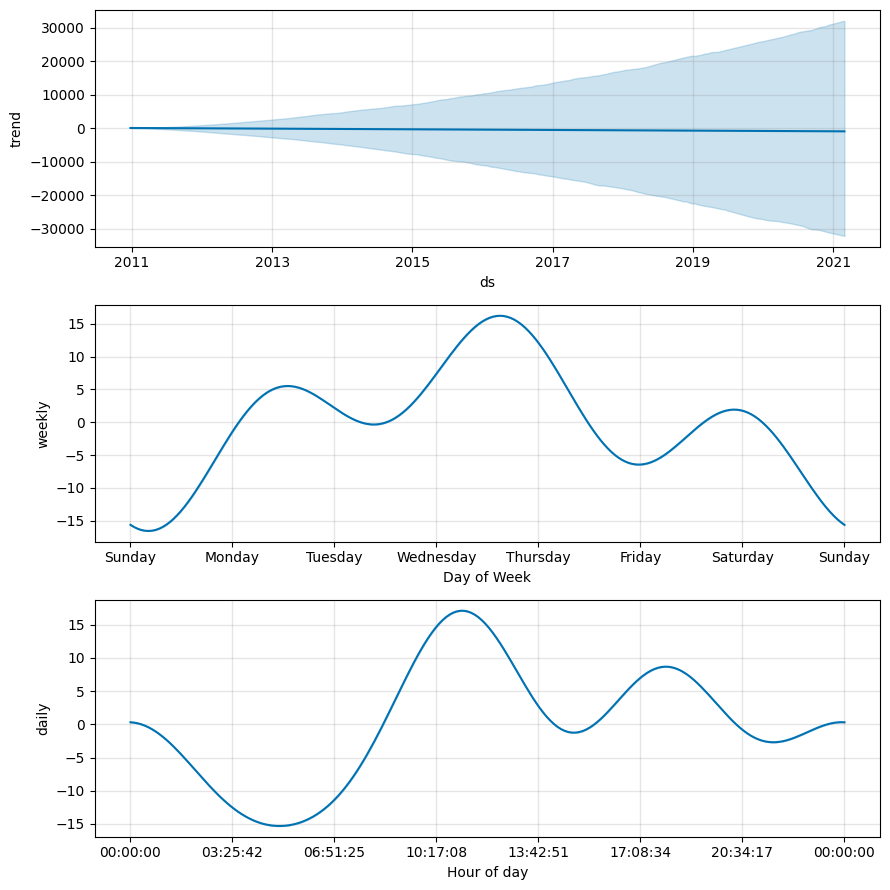

In [53]:
train_df = train_set[['FullDate', 'ElecPrice']]
train_df.rename(columns={'FullDate': 'ds', 'ElecPrice': 'y'}, inplace=True)
model = Prophet()
model.fit(train_df)

test_df = test_set[['FullDate']]
test_df.rename(columns={'FullDate': 'ds'}, inplace=True)
forecast = model.predict(test_df)


model.plot_components(forecast)

# Find the month of the yearly seasonality with the highest value
yearly_seasonality = forecast[['ds', 'yearly']]
month_with_highest_value = yearly_seasonality.loc[yearly_seasonality['yearly'] == yearly_seasonality['yearly'].max(), 'ds']
print("Month with the highest value of yearly seasonality:", month_with_highest_value.dt.month_name().values[0])

In [30]:
train_df = train_set[['FullDate', 'ElecPrice', 'SysLoad', 'Tmax', 'GasPrice']]
train_df.rename(columns={'FullDate': 'ds', 'ElecPrice': 'y', 'SysLoad': 'add1', 'Tmax': 'add2', 'GasPrice': 'add3'}, inplace=True)
train_df.head()

,ds,y,add1,add2,add3
0,2010-09-01 00:00:00,23.710,1688.215,15.8,3.69
1,2010-09-01 01:00:00,22.635,1669.195,15.8,3.69
2,2010-09-01 02:00:00,22.565,1491.980,15.8,3.69
3,2010-09-01 03:00:00,18.910,1330.760,15.8,3.69
4,2010-09-01 04:00:00,18.030,1247.940,15.8,3.69


In [31]:
model = Prophet()
model.add_regressor('add1')
model.add_regressor('add2')
model.add_regressor('add3')
model.fit(train_df)
test_df = test_set[['FullDate', 'SysLoad', 'Tmax', 'GasPrice']]
test_df.rename(columns={'FullDate': 'ds', 'SysLoad': 'add1', 'Tmax': 'add2', 'GasPrice': 'add3'}, inplace=True)
forecast = model.predict(test_df)
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp83e1xk1y/liih91qa.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp83e1xk1y/o5i1p960.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=98497', 'data', 'file=/tmp/tmp83e1xk1y/liih91qa.json', 'init=/tmp/tmp83e1xk1y/o5i1p960.json', 'output', 'file=/tmp/tmp83e1xk1y/prophet_modelf72tkyu6/prophet_model-20230801175802.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:58:02 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:58:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
<ipython-input-31-a908dd78bc72>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the cavea

                       ds         yhat    yhat_lower    yhat_upper
89254 2021-02-28 19:00:00  2385.440388 -25367.196942  30931.189421
89255 2021-02-28 20:00:00  2394.399875 -25456.354429  30926.659169
89256 2021-02-28 21:00:00  2390.471775 -25404.346814  30744.159886
89257 2021-02-28 22:00:00  2390.997678 -25400.643166  30910.604171
89258 2021-02-28 23:00:00  2395.603124 -25492.760874  30854.703291


In [32]:
train_df = train_set[['FullDate', 'ElecPrice', 'SysLoad', 'Tmax', 'GasPrice']]
train_df.rename(columns={'FullDate': 'ds', 'ElecPrice': 'y', 'SysLoad': 'add1', 'Tmax': 'add2', 'GasPrice': 'add3'}, inplace=True)
model = Prophet()
model.add_regressor('add1')
model.add_regressor('add2')
model.add_regressor('add3')
model.fit(train_df)

test_df = test_set[['FullDate', 'SysLoad', 'Tmax', 'GasPrice']]
test_df.rename(columns={'FullDate': 'ds', 'SysLoad': 'add1', 'Tmax': 'add2', 'GasPrice': 'add3'}, inplace=True)
forecast = model.predict(test_df)

actual_values = test_set['ElecPrice']
predicted_values = forecast['yhat']
epsilon = 1e-8
actual_values_nonzero = actual_values.replace(0, epsilon)
absolute_percentage_errors = abs((actual_values - predicted_values) / actual_values_nonzero)
mape = 100 * absolute_percentage_errors.mean()
print("MAPE on the test set:", format(mape, ".2f"), "%")






INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp83e1xk1y/lzwafn35.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp83e1xk1y/9wq25s3p.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=65337', 'data', 'file=/tmp/tmp83e1xk1y/lzwafn35.json', 'init=/tmp/tmp83e1xk1y/9wq25s3p.json', 'output', 'file=/tmp/tmp83e1xk1y/prophet_modelai536euf/prophet_model-20230801180225.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:02:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:02:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
<ipython-input-32-85570dceec68>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the cave

MAPE on the test set: 3277720704.74 %
